# Introducción al Aprendizaje Automático

## 1. Clasificación Binaria - Regresor Logístico

Dentro del amplio mundo del Aprendizaje Automático, los modelos de clasificación se presentan como herramientas para categorizar y etiquetar datos en distintos grupos o clases. Estos modelos abarcan una variedad de técnicas, adaptándose a los diferentes tipos de datos y problemáticas. Previamente, exploramos los Árboles de Decisión, un modelo que segmenta el espacio de características en decisiones jerárquicas. Sin embargo, en esta ocasión, centraremos nuestra atención en el Regresor Logístico, **un modelo matemático que, a pesar de su nombre, es ampliamente utilizado para tareas de clasificación binaria y multiclase, aprovechando la relación entre variables independientes y la probabilidad de ocurrencia de un evento particular.**

#### Conjunto de datos

Para mostrar de forma clara los conceptos, utilizaremos el mismo dataset artificial utilizado en la clase 2:

In [18]:
#Librerias que vamos a utilizar en este notebook
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
df = pd.read_csv('/content/drive/MyDrive/Lic_en_Datos/IAA/datos/IAA_Guia_2_clasificacion_binaria.csv')  #drive mica
#df = pd.read_csv('IAA_Guia_2_clasificacion_binaria.csv')
df.head()

,x1,x2,target
0,-0.422635,-0.932620,1.0
1,-3.036275,0.482545,0.0
2,-0.634106,-0.040808,1.0
3,-0.448945,0.330000,1.0
4,0.293817,0.638174,1.0


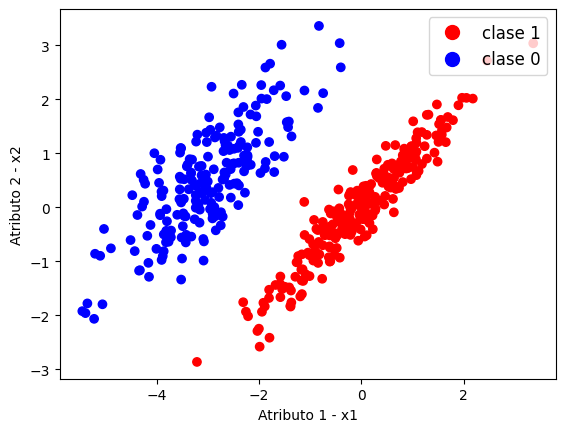

In [21]:
# Plot the data
plt.scatter(df.x1, df.x2, c=df.target, cmap='bwr')
plt.xlabel('Atributo 1 - x1')
plt.ylabel('Atributo 2 - x2')

### Create legend with red and blue colors, and text "clase 1" and "clase 2"
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='r', label='clase 1')
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='b', label='clase 0')
plt.legend(handles=[red_patch[0], blue_patch[0]], loc='upper right', fontsize=12)
plt.show()

Los modelos lineales de clasificación consisten en trazar una línea recta que divida de un lado una clase y de otro lado otra. En el caso de más de dos dimensiones, consiste en colocar un hiperplano que divida el espacio en dos mitades; a un lado y el otro del hiperplano, clasificamos como una u otra clase.

La manera matemática de caracterizar una linea recta en un plano es con una simple ecuación:
$$ \beta_1  x_1 + \beta_2 x_2 = cte $$
donde $\beta_1$ y $\beta_2$ determinan el ángulo de la linea, y la constante mueve paralelamente esa recta. A los números $\beta_i$ se le llaman _pesos_.

En el caso más general de $n$ dimensiones, generaliza de igual forma:
$$
\beta_0 + \beta_1  x_1 + \beta_2 x_2 + ... + \beta_n  x_n = 0
$$
donde a la constante la reescribimo como $-\beta_0$ para llevar la ecuación a una forma convencional.

- Al hiperplano que separa los puntos se le llama **_"frontera de decisión"_**.

- Éste esta caracterizado por ser donde se anula la función lineal $f(\vec \beta, \vec x) = \beta_0 + \beta_1  x_1 + \beta_2 x_2 + ... + \beta_n  x_n $

- A la función usada para clasificar se le llama **función discriminante**.

**Ejercicio:** Para el caso con dos atributos, responde:
* ¿Cómo deberían ser $\beta_1$ y $\beta_2$ para que la recta sea horizontal?¿Y para que sea vertical?
* ¿Cómo se relacionan $x_1$, $x_2$, $\beta_0$, $\beta_1$ y $\beta_2$ con la pendiente de la recta y la ordenada al origen de la forma lineal $y = mx + b$?

**Ejercicio:** Explorá la función `model` y utilizala - junto con `plot` - para encontrar la mejor frontera de decisión.

In [22]:
def model(beta, x1, x2):
    return beta[0] +beta[1]*x1 + beta[2]*x2 > 0

def plot(x1, x2, target, pred, beta=[]):

    plt.scatter(x1[target==0], x2[target==0], marker='o', c=np.where(pred[target==0], 'r', 'b'), label='Class 0')
    plt.scatter(x1[target==1], x2[target==1], marker='v', c=np.where(pred[target==1], 'r', 'b'), label='Class 1')
    plt.legend()
    if len(beta) >= 3 and (beta[2]!=0 or beta[1]!=0):
        if beta[2]==0:
            plt.vlines(-beta[0]/beta[1],x2.min(), x2.max(), ls='-.', colors='black')
        else:
            u = np.linspace(min(x1), max(x1), 100)
            v = -(beta[0] + beta[1]*u) / beta[2]
            plt.plot(u,v, ls='-.', c='black')
    plt.xlabel('Atributo 1 - x1')
    plt.ylabel('Atributo 2 - x2')
    plt.legend()

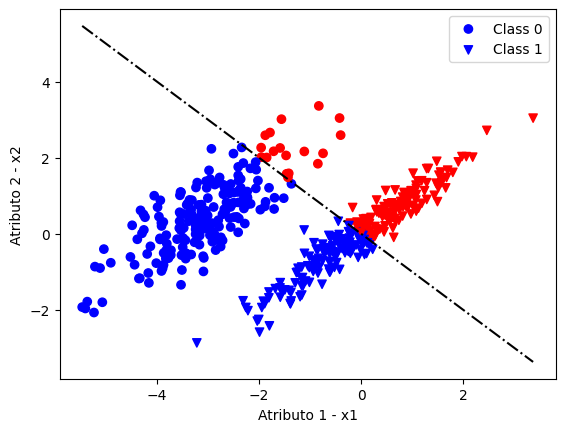

In [23]:
#Tu turno...
w =[
    0, #beta0
    1, #beta1
    1, #beta2
    ]

preds = model(w, df.x1, df.x2)
plot(df.x1, df.x2, df.target, preds,w)

Éste es el más sencillo de los métodos llamados de _función discriminante_. Estos consisten en ajustar una función escalar, cuyo valor determina la clase a la que pertenece, dependiendo de si está por encima o debajo del _umbral de decisión_.

A esta función lineal, cuando se combina con un método particular para elegir los pesos $\beta$, se le llama _modelo_. Un caso particular es el llamado _Perceptrón_ que corresponde a elegir el $\beta$ que minimice el número de puntos mal clasificados.

## Regresor Logístico

El regresor logístico es un método discriminativo, es decir que nos provee no sólo la predicción de _a que clase pertenece una muestra_, sino que responde a la pregunta de _cual es la probabilidad de que una muestra pertenezca a una clase_. Esta probabilidad podrá ser luego usada para clasificar (es decir, usando la probabilidad como función discriminante), donde se asigna cada muestra a la clase más probable (umbral = 0.5) o de otra forma a su elección.

Es un _modelo lineal generalizado_, es decir que se basa en un modelo lineal cuyo resultado se pasa por una _función de vínculo_ que en este caso es la función sigmoide.
Matemáticamente:
$$ p = \sigma(\beta_0 + \beta_1 x^{(i)}_1 + ... + + \beta_N x^{(i)}_N) $$

siendo $\sigma $ la función sigmoide $\sigma(z) = \frac{1}{1 + e^{-z}}$

Text(0, 0.5, '$\\sigma (z)$')

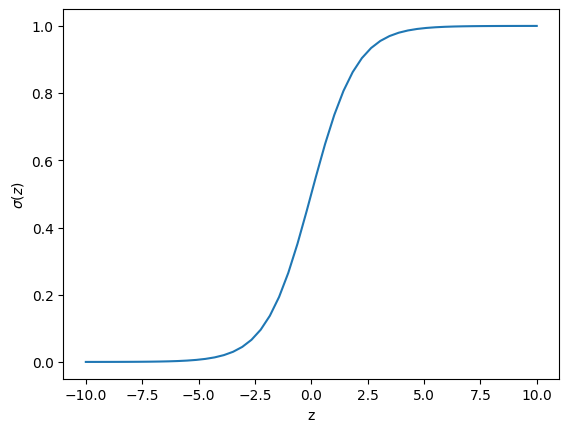

In [24]:
#Grafico la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10,10)
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("$\sigma (z)$")

**Ejercicio**
1. Use el regresor logístico de Scikit-Learn para ajustar los datos. Utilice el parámetro `penalty = 'none'`.



In [27]:
# Definimos X y y
X = df[['x1', 'x2']]
y = df['target']

# Creamos el modelo logístico sin penalización
log_model = LogisticRegression(penalty=None, solver='lbfgs')

# Ajustamos el modelo a los datos
log_model.fit(X, y)
 # lbfgs permite penalty='none'

LogisticRegression(penalty=None)

2. Calcule el vector de probabilidades predichas por el modelo ajustado sobre el dataset. Examine e interprete su resultado.

*Pistas: `.predict_proba(X)`*


In [28]:
# Vector de probabilidades predichas
probs = log_model.predict_proba(X)

# Mostrar las primeras 10 filas
print("Primeras 10 probabilidades predichas:")
print(probs[:10])


Primeras 10 probabilidades predichas:
[[9.85410864e-10 9.99999999e-01]
 [9.99999978e-01 2.18327146e-08]
 [2.14131949e-05 9.99978587e-01]
 [9.14055950e-05 9.99908594e-01]
 [9.02493729e-07 9.99999098e-01]
 [9.99999999e-01 7.75056193e-10]
 [8.30815408e-07 9.99999169e-01]
 [1.14129463e-08 9.99999989e-01]
 [9.99921660e-01 7.83403476e-05]
 [1.75514692e-09 9.99999998e-01]]


3. Obtenga los pesos del modelo lineal y utilícelos para graficar la frontera de decisión.

*Pistas:*
- Considere los atributos `.coef_` y `.intercept_` del regresor logístico.
- La frontera de decisíon (típicamente) se obtiene cuando la sigmoide toca el umbral 0.5. Sabiendo esto:
    * Con lápiz y papel, obtenga la fórmula para la frontera de decisión.
    * Valerse de la función de ploteo utilizada anterioremente para graficar la frontera.

In [29]:
# Coeficientes
print('Pesos (coeficientes):', log_model.coef_)
print('Ordenada al origen (intercepto):', log_model.intercept_)

Pesos (coeficientes): [[ 9.89032727 -8.85272318]]
Ordenada al origen (intercepto): [16.66172931]


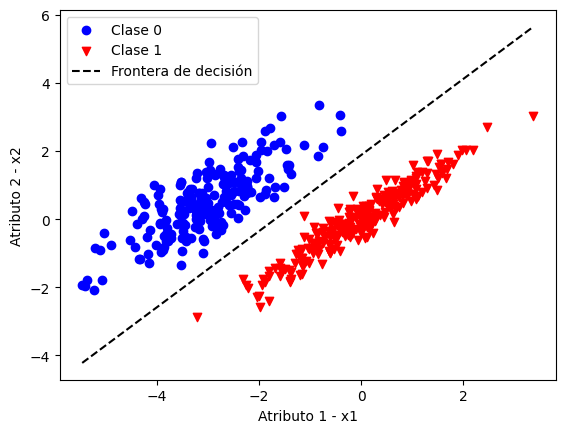

In [30]:
def plot_decision_boundary(x1, x2, target, model):
    plt.scatter(x1[target==0], x2[target==0], marker='o', color='b', label='Clase 0')
    plt.scatter(x1[target==1], x2[target==1], marker='v', color='r', label='Clase 1')

    # Obtener coeficientes
    b0 = model.intercept_[0]
    b1, b2 = model.coef_[0]

    # Graficar frontera de decisión
    u = np.linspace(min(x1), max(x1), 100)
    v = -(b0 + b1*u) / b2
    plt.plot(u, v, 'k--', label='Frontera de decisión')

    plt.xlabel('Atributo 1 - x1')
    plt.ylabel('Atributo 2 - x2')
    plt.legend()

# Lo llamás así:
plot_decision_boundary(df.x1, df.x2, df.target, log_model)
plt.show()


4. Utilice la siguiente función para graficar la frontera de decisión y los puntos de entrenamiento. Interprete.

In [31]:
# Función que nos ayuda a graficar
# No hace falta que comprandan este bloque de código.
def visualize_classifier(model, X, y, ax=None, proba = False):
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    ax = ax or plt.gca()

    colors_tab10 = plt.cm.tab10.colors

    for i, y_value in enumerate(reversed(np.unique(y))):
        ax.scatter(X[y==y_value, 0], X[y==y_value, 1], s=30,
                   zorder=3, alpha = 0.5, color = colors_tab10[i])

    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    # ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))

    if proba:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)


    # Create a color plot with the results
    Z = -Z + 1
    ax.pcolormesh(xx,yy,Z,cmap='bwr', vmin = 0, vmax=1, alpha = 0.2)

    ax.set(xlim=xlim, ylim=ylim)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


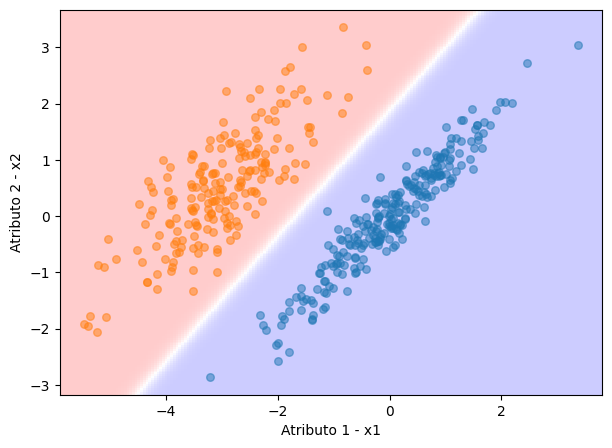

In [33]:
fig, axs = plt.subplots(1,1, figsize = (7,5))
visualize_classifier(log_model, X, y, ax = axs, proba = True)
axs.set_xlabel('Atributo 1 - x1')
axs.set_ylabel('Atributo 2 - x2')
plt.show()


**Ejercicio - Para pensar e implementar:** En la regresión lineal vimos que era importante escalar los datos. ¿Y con la regresión logística?¿Cómo se interpretan los coeficientes? Implementa.

#### Conjunto de datos de Pingüinos

Aplica lo visto al conjunto de datos de Pingüinos. La tarea consiste en clasificar el genero de los pingüinos a partir de sus características físicas.

**Ejercicio:** Selecciona dos atributos donde te parezca que las dos clases sean linealmente separables y utiliza un modelo de Regresión Logística. Comparar con los resultados obtenidos al aplicar un Árbol de Decisión. Evalúa ambos modelos usando las herramientas vistas en la guía de Evaluación. Visualiza la frontera. ¿Qué observas?

**Ejercicio:**  Repite para otros pares de atributos donde no parezca haber una separación lineal. ¿Qué observas?.

**Ejercicio:** Repite los ejercicios anteriores, pero usando más de dos atributos.

In [35]:
df = pd.read_csv('/content/drive/MyDrive/Lic_en_Datos/IAA/datos/penguins_size.csv')  #drive mica
#df = pd.read_csv('IAA_Guia_2_clasificacion_binaria.csv')
df = df.dropna()  # Eliminar los valores nulos si los hubiera

In [37]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [38]:
# Selección de características y objetivo
X = df[['culmen_length_mm', 'culmen_depth_mm']]
y = df['species']  # Género del pingüino

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.metrics import accuracy_score, classification_report
# Crear el modelo de Regresión Logística
log_model = LogisticRegression(max_iter=200)

# Entrenar el modelo
log_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_log = log_model.predict(X_test)

# Evaluar el modelo
print("Regresión Logística:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Regresión Logística:
Accuracy: 0.9603960396039604
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        49
   Chinstrap       0.89      0.89      0.89        18
      Gentoo       0.97      0.94      0.96        34

    accuracy                           0.96       101
   macro avg       0.95      0.94      0.94       101
weighted avg       0.96      0.96      0.96       101



In [46]:
from sklearn.tree import DecisionTreeClassifier
# Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = tree_model.predict(X_test)

# Evaluar el modelo
print("Árbol de Decisión:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Árbol de Decisión:
Accuracy: 0.900990099009901
              precision    recall  f1-score   support

      Adelie       0.96      0.96      0.96        49
   Chinstrap       0.71      0.83      0.77        18
      Gentoo       0.94      0.85      0.89        34

    accuracy                           0.90       101
   macro avg       0.87      0.88      0.87       101
weighted avg       0.91      0.90      0.90       101



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

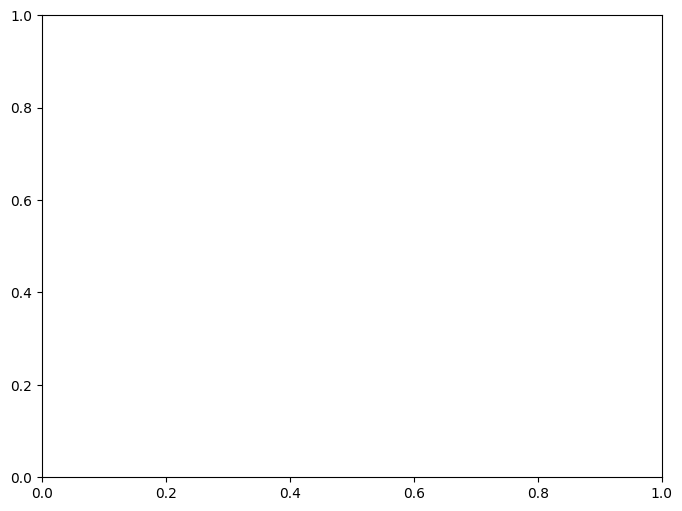

In [45]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_decision_boundary(X, model, ax, **kwargs):
    h = .02  # tamaño de paso en el grid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.RdYlBu)
    ax.set_title("Regresión Logística")
    return scatter

fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(X, log_model, ax)
plt.xlabel('Longitud del pico')
plt.ylabel('Profundidad del pico')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

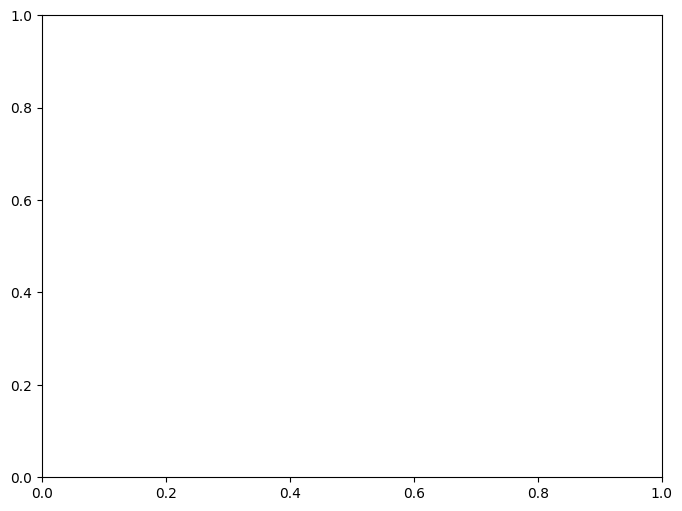

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(X, tree_model, ax)
plt.xlabel('Longitud del pico')
plt.ylabel('Profundidad del pico')
plt.show()




## 2. Curva ROC

La curva ROC es un gráfico de $TPR$ en función de $FPR$ para un modelo dado. Recordemos que

$TPR = \frac{VP}{VP + FN}$

$FPR = \frac{FP}{FP + VN}$

FPR es fácilmente interpretable como la proporción de instancias negativas que fueron falsamente clasificadas como positivas. De esta manera, el FPR informa efectivamente sobre el desempeño del modelo sobre la clase negativa, ya que su complemento es la tasa de aciertos sobre esa clase.

De esta forma, la curva ROC representa compromisos relativos entre beneficios (verdaderos positivos) y costos (falsos positivos). Un clasificador discreto - que solamente devuelve etiquetas - está representado como un único punto en el espacio ROC. En el extremo inferior izquierdo ($FPR = 0, TPR = 0$) se ubica el clasificador que siempre predice la clase negativa; en ese caso, nunca obtiene un falso positivo, pero tampoco un verdadero positivo. En el extremo superior derecho ($FPR = 1, TPR = 1$) se encuentra el caso contrario, el que siempre predice la clase positiva. Un clasificador ideal se encuentra en la esquina superior izquierda ($FPR = 0, TPR = 1$). Un punto sobre la línea diagonal identidad ($FPR = TPR = p$) corresponde a un clasificador que asigna la clase positiva al azar con probabilidad $p$.

Más interesante es el análisis ROC de clasificadores que devuelven un puntaje (score) de pertenencia a cada clase (algunos autores reservan la palabra modelo para estos clasificadores). El comportamiento por defecto es asignar la etiqueta correspondiente a la clase con mayor puntaje; sin embargo, otra opción consiste en asignar la etiqueta positiva únicamente cuando el puntaje supera cierto umbral, caso contrario asigna una etiqueta negativa. De esta forma, se obtiene una sucesión de puntos en el espacio ROC, cada uno asociado a un umbral distinto. La curva ROC así obtenida posee un conjunto de ventajas que la convierten en una herramienta sumamente interesante para evaluar el desempeño de los modelos:

* La comparación de un modelo con modelos de referencia (siempre positivo, siempre negativo, aleatorio) es inmediata.
* Permite elegir el umbral de discriminación para un modelo de acuerdo a ciertas necesidades operativas, explícitamente evaluando los compromisos entre verdaderos positivos y falsos positivos.
* El área bajo la curva ROC (AUC-ROC) sirve como métrica de desempeño de un modelo. Esta métrica estima la probabilidad de que una instancia de la clase positiva elegida al azar tenga un puntaje más alto que una instancia negativa elegida al azar. Esta métrica toma valores entre 0 y 1, pero la cota inferior realista es 0.5, que corresponde a un modelo aleatorio.
* La comparación entre modelos puede realizarse a través del AUC-ROC o, más en detalle, observando regiones donde un modelo supera en desempeño a otro. Otra forma es a través del uso de la Envolvente Convexa ROC (ROC convex hull) que no exploraremos en este notebook.
* La curva ROC, así como lo son el TPR y el FPR, es invariante frente al desbalance de clases $r$ en el limite poblacional, aunque sí es posible observar algunas variaciones estadísticas en los casos muestrales a medida que $r$ varía.

El análisis de curvas ROC puede ser sumamente rico e informativo, extendiéndose más allá de las características aquí mencionadas.

**Para Pensar:** ¿Por qué TPR y FPR son métricas que no dependen del balance de clases?

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

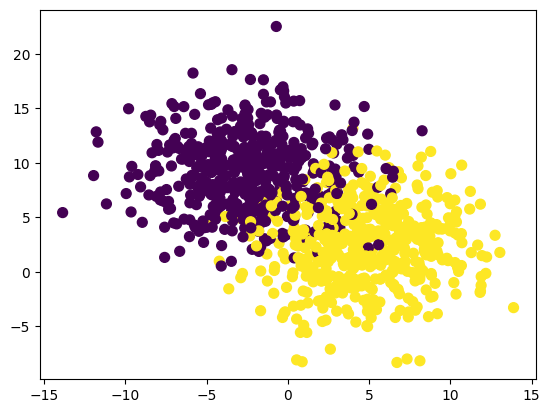

In [49]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, cluster_std=3.5, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()

In [50]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
clf_rl = LogisticRegression(penalty=None)

clf_rl.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [52]:
y_train_proba = clf_rl.predict_proba(X_train)[:,1]
y_test_proba = clf_rl.predict_proba(X_test)[:,1]

Comparemos los score predichos en cada conjunto:

In [53]:
p_1_train = y_train_proba[y_train==1]
p_0_train = y_train_proba[y_train==0]

p_1_test = y_test_proba[y_test==1]
p_0_test =  y_test_proba[y_test==0]

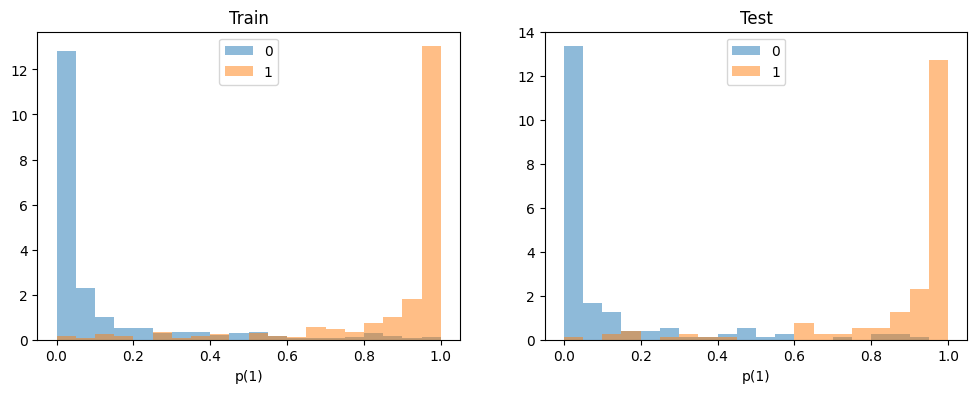

In [54]:
fig, axs = plt.subplots(1,2, figsize = (12,4))

axs[0].set_title('Train')
axs[0].hist(p_0_train, label='0', alpha=0.5, density=True, bins = np.linspace(0,1,21))
axs[0].hist(p_1_train, label='1', alpha = 0.5, density=True, bins = np.linspace(0,1,21))
axs[0].set_xlabel('p(1)')
# axs[0].set_yscale('log')
axs[0].legend()

axs[1].set_title('Test')
axs[1].hist(p_0_test, label='0', alpha = 0.5, density=True, bins = np.linspace(0,1,21))
axs[1].hist(p_1_test, label='1', alpha = 0.5, density=True, bins = np.linspace(0,1,21))
axs[1].set_xlabel('p(1)')
# axs[1].axvline(0.2, ls='--', color = 'k')
# axs[1].set_yscale('log')
axs[1].legend()

plt.show()

### Curva ROC *a mano*

Vamos a hacer una curva ROC *a mano*. Esto significa ir variando el umbral de clasificación sobre los scores predichos y calcular el TPR y FPR. ¿Cómo está relacionado con el gráfico anterior? A modo de recordatorio, la curva ROC es un gráfico de $TPR$ en función de $FPR$ para un modelo dado, donde

$TPR = \frac{VP}{VP + FN}$

$FPR = \frac{FP}{FP + VN}$

In [ ]:
threholds = np.linspace(-0.01, 1.01, 103)
TPR = []
FPR = []
precision = []
positives = y_test.sum()
negatives = len(y_test) - positives


for threhold in threholds:
    predictions = (prediction).astype(int)
    TP = ((y_test == 1) & (predictions == 1)).sum()
    FP = COMPLETAR
    FN = COMPLETAR
    VN = COMPLETAR

    TPR.append(COMPLETAR)
    FPR.append(COMPLETAR)
    precision.append(COMPLETAR)

TPR = np.array(TPR)
FPR = np.array(FPR)
precision = np.array(precision)
recall = TPR

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


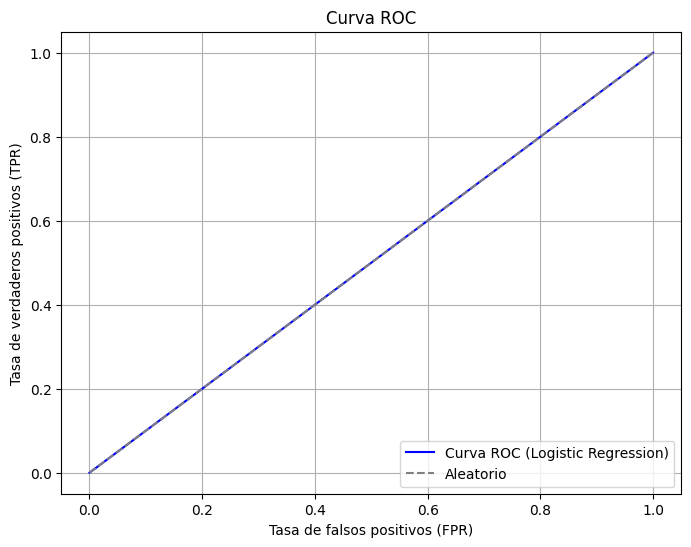

AUC: 0.5000


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Variables
threholds = np.linspace(-0.01, 1.01, 103)  # Umbrales de decisión
TPR = []  # True Positive Rate
FPR = []  # False Positive Rate
precision = []  # Precisión
positives = y_test.sum()  # Casos positivos en el conjunto de prueba
negatives = len(y_test) - positives  # Casos negativos en el conjunto de prueba

# Predicciones del modelo (debe ser probabilidades, no etiquetas)
predictions_prob = log_model.predict_proba(X_test)[:, 1]  # Probabilidades de clase positiva (1)

# Calcular TPR, FPR y precisión para cada umbral
for threshold in threholds:
    # Convertir las probabilidades a predicciones de clase 0 o 1 basadas en el umbral
    predictions = (predictions_prob >= threshold).astype(int)

    # Cálculo de TP, FP, FN, TN
    TP = ((y_test == 1) & (predictions == 1)).sum()  # Casos positivos correctamente clasificados
    FP = ((y_test == 0) & (predictions == 1)).sum()  # Casos negativos clasificados como positivos
    FN = ((y_test == 1) & (predictions == 0)).sum()  # Casos positivos clasificados como negativos
    TN = ((y_test == 0) & (predictions == 0)).sum()  # Casos negativos correctamente clasificados

    # Calcular TPR, FPR, y precisión
    TPR.append(TP / (TP + FN) if TP + FN > 0 else 0)  # True Positive Rate (Recall)
    FPR.append(FP / (FP + TN) if FP + TN > 0 else 0)  # False Positive Rate
    precision.append(TP / (TP + FP) if TP + FP > 0 else 0)  # Precisión

# Convertir listas a arrays
TPR = np.array(TPR)
FPR = np.array(FPR)
precision = np.array(precision)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(FPR, TPR, color='blue', label='Curva ROC (Logistic Regression)')

# Dibujar la línea diagonal (sin capacidad de clasificación)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Aleatorio')

plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calcular AUC (Area Under the Curve)
roc_auc = auc(FPR, TPR)
print(f'AUC: {roc_auc:.4f}')


Graficamos junto con la curva obtenida por Scikit-Learn

In [ ]:
plt.scatter(FPR, TPR, label = 'Curva ROC a mano', s = 16, color = 'green', alpha = 0.75)

### CURVA DE SCIKIT LEARN
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

plt.plot(fpr, tpr, ls = '--', label = 'Curva ROC Scikit-Learn')
plt.plot(FPR_random, TPR_random, ls = '--',color = 'k', label = 'Modelo Aleatorio')
plt.grid()
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')


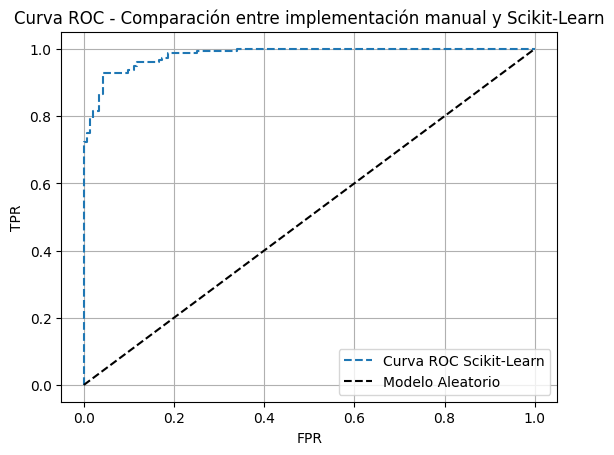

In [57]:
# CURVA DE SCIKIT LEARN
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

plt.plot(fpr, tpr, ls='--', label='Curva ROC Scikit-Learn')

# Modelo aleatorio (FPR vs TPR)
FPR_random = np.linspace(0, 1, 100)
TPR_random = FPR_random  # Para un modelo aleatorio, TPR = FPR
plt.plot(FPR_random, TPR_random, ls='--', color='k', label='Modelo Aleatorio')

# Personalización de la gráfica
plt.grid(True)
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - Comparación entre implementación manual y Scikit-Learn')
plt.show()

**Ejercicio:** calcula el área bajo la curva ROC. Las funciones  `auc` y `roc_auc_score` de Scikit-Learn pueden ser de utilidad.

In [58]:
# COMPLETAR
from sklearn.metrics import roc_curve, auc

# Suponiendo que ya tienes y_test y y_test_proba
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

# Calculamos el área bajo la curva
roc_auc = auc(fpr, tpr)

print(f"AUC calculado con auc(): {roc_auc:.4f}")


AUC calculado con auc(): 0.9824


**Ejercicio:** Nuevamente, aplica lo visto al conjunto de datos de Pingüinos, en la tarea para clasificar el genero de los pingüinos a partir de sus características físicas. Investiga cómo usar la métrica AUC-ROC junto con validación cruzada en Scikit-Learn. Calcula el AUC-ROC para un modelo de Regresión Logística y observa qué ocurre a medida que aumentamos el número de atributos utilizados.

### Otras métricas

Podemos ver cómo varían algunas métricas a medida que variamos el umbral

NameError: name 'recall' is not defined

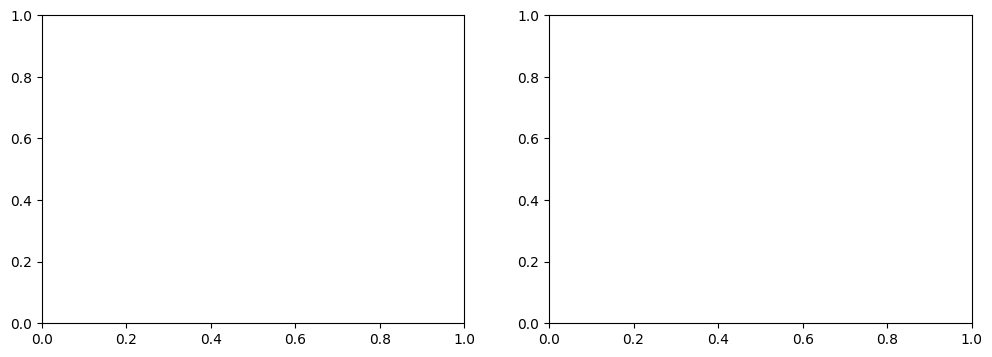

In [59]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
axs[0].plot(threholds, recall, label = 'Exhaustividad/TPR')
axs[0].plot(threholds, FPR, label = 'FPR')
axs[0].plot(threholds, precision, label = 'Precisión')


axs[0].legend()
axs[0].set_xlabel('Umbral')

axs[1].plot(threholds, recall, label = 'Exhaustividad/TPR')
axs[1].plot(threholds, FPR, label = 'FPR')
axs[1].plot(threholds, 2*(precision*recall)/(precision+recall), label = 'F-Score')

axs[1].legend()
axs[1].set_xlabel('Umbral')

La curva Precisión/Exhaustividad es otra curva que se pueden encontrar. Hay que tener cierta precausión con esta curva, porque depende del balance de clases a través de la precisión. Interpreta cada extremo de la curva.

In [60]:
plt.plot(recall, precision)
plt.xlabel('Exhaustividad/TPR')
plt.ylabel('Precisión')
plt.grid()

NameError: name 'recall' is not defined